In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
glob.glob(r'E:\Data Analysis\projects\stock\individual_stocks_5yr/*csv')

['E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAL_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAPL_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAP_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABBV_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABC_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABT_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ACN_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADBE_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADI_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADM_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADP_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADSK_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADS_data.csv',
 'E:\\Da

In [4]:
data = [
    r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAPL_data.csv',
    r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\GOOGL_data.csv'
    
]

# reading data set for apple and google only 

In [5]:
df = pd.DataFrame()

# creating a dataframe to store values of the raw data

In [6]:
for file in data:
    da = pd.read_csv(file)
    df = df.append(da)
    
# function to read and append the raw string values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6488\284259878.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(da)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6488\284259878.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(da)


In [7]:
print(df)

            date       open       high        low      close     volume   Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416   AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425   AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363   AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995   AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154   AAPL
...          ...        ...        ...        ...        ...        ...    ...
1254  2018-02-01  1175.9900  1187.4500  1169.3600  1181.5900    3675709  GOOGL
1255  2018-02-02  1127.4200  1131.3000  1111.1700  1119.2000    5892122  GOOGL
1256  2018-02-05  1100.6100  1114.9900  1056.7400  1062.3900    4177469  GOOGL
1257  2018-02-06  1033.9800  1087.3800  1030.0100  1084.4300    3831524  GOOGL
1258  2018-02-07  1084.9700  1086.5300  1054.6200  1055.4100    2597094  GOOGL

[2518 rows x 7 columns]


In [8]:
df['Name'].unique()

array(['AAPL', 'GOOGL'], dtype=object)

In [9]:
# Now lets Check the Null Values in the Data

df.isnull().sum()


# we dont find any null values in the data 

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
df.dtypes

# checking all the data types of the columns

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
# changing dates into date type from object


df['date'] = pd.to_datetime(df['date'])

In [12]:
df['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, Length: 2518, dtype: datetime64[ns]

In [13]:
df['Year'] = df['date'].dt.strftime('%Y')

In [14]:
# NOw filtering data only for the apple

apple = df[df['Name']=='AAPL']

In [15]:
#apple.groupby('Year')['close'].sum().plot(kind = 'line')


# this is not good looking to make it goood looking , we will call another library

import seaborn as sns
import matplotlib.pyplot as plt

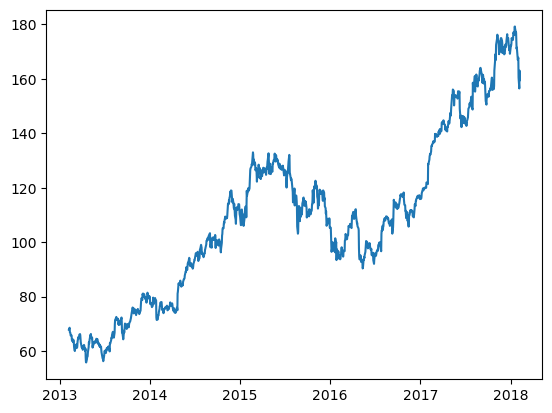

In [16]:
plt.plot(apple['date'],apple['close'])

In [17]:
Google = df[df['Name']=='GOOGL']

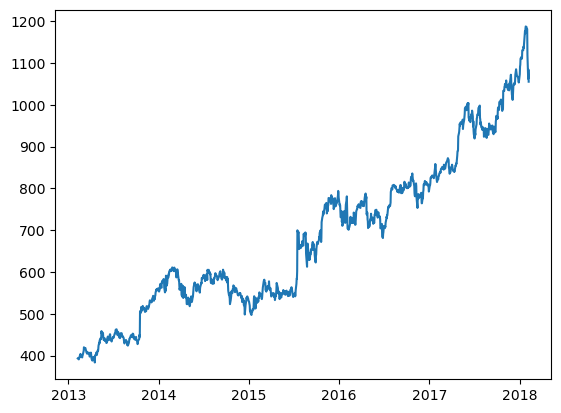

In [18]:
plt.plot(Google['date'],Google['close'])

In [19]:
new_df = df.copy()

In [20]:
# now we will find the Moving Average in the data


#   2nd part

In [21]:
new_df['Name'].unique()

array(['AAPL', 'GOOGL'], dtype=object)

In [22]:
new_df.set_index('date',inplace = True)

In [23]:
new_df.head(2)

open     high      low    close     volume  Name  Year
date                                                                 
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL  2013
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL  2013

In [24]:
time = [10,50,100,200]

for i in time:
    new_df['close_'+(str(i))] = new_df['close'].rolling(i).mean()

In [25]:
new_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'Year', 'close_10',
       'close_50', 'close_100', 'close_200'],
      dtype='object')

In [26]:
apple = new_df[new_df['Name']=='AAPL']

<AxesSubplot:xlabel='date'>

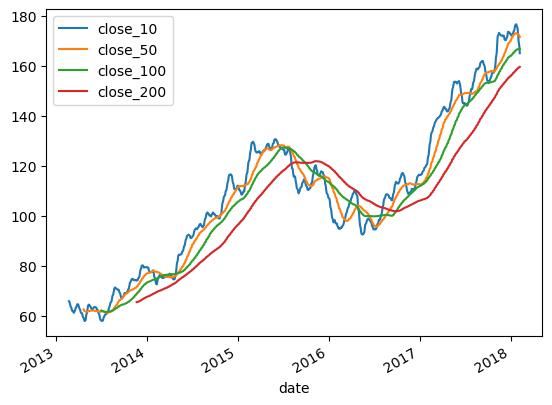

In [27]:
apple[['close_10','close_50','close_100','close_200']].plot()


# IN Pandas we have to be carefull ,  because we are plotting on bases of our Index column here it is (Date) column on which we are plotting

In [28]:
google = new_df[new_df['Name']=='GOOGL']

<AxesSubplot:xlabel='date'>

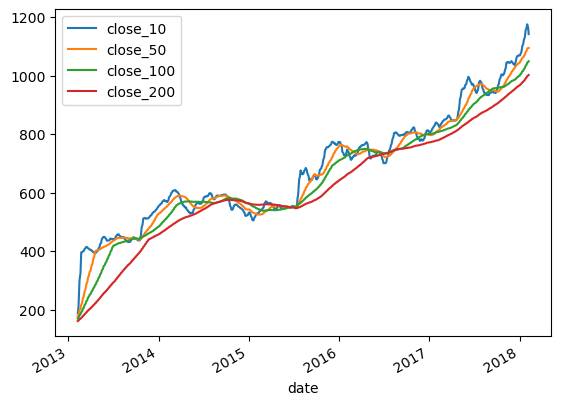

In [29]:
google[['close_10','close_50','close_100','close_200']].plot()


# IN Pandas we have to be carefull ,  because we are plotting on bases of our Index column here it is (Date) column on which we are plotting

In [30]:
# 3rd 

In [31]:
# each day change in apple stock

# pct change - value with prior element

In [32]:
apple['feat'] = apple['close'].pct_change()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6488\1932080208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['feat'] = apple['close'].pct_change()


In [33]:
import plotly.express as px

apple.reset_index(inplace = True)

In [34]:
px.line(apple, x ='date',y ='feat')

In [35]:
# 4 Resampling of data , we can perform it 
#  monthly any time but our column need to be index column
# for apple we are performing it

In [36]:
apple.set_index('date',inplace = True)

In [37]:
apple.head(2)

open     high      low    close     volume  Name  Year  \
date                                                                    
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL  2013   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL  2013   

            close_10  close_50  close_100  close_200      feat  
date                                                            
2013-02-08       NaN       NaN        NaN        NaN       NaN  
2013-02-11       NaN       NaN        NaN        NaN  0.010422

<AxesSubplot:xlabel='date'>

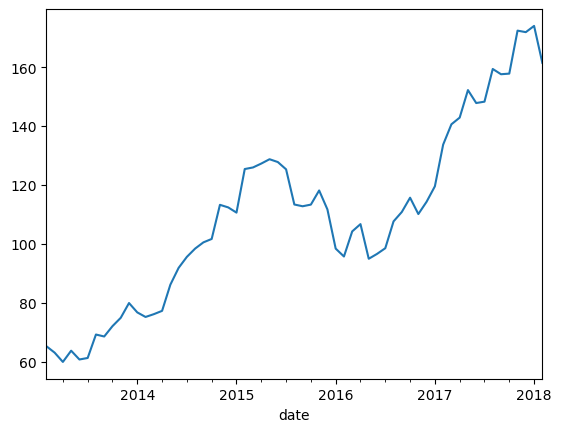

In [40]:
apple['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

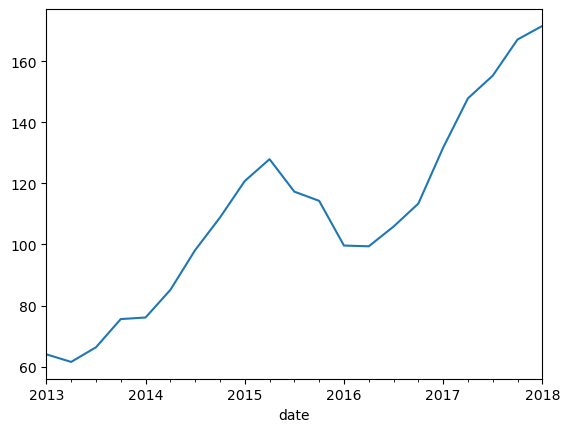

In [64]:
apple['close'].resample('Q').mean().plot()

In [66]:
glob.glob(r'E:\Data Analysis\projects\stock\individual_stocks_5yr/*csv')

['E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAL_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAPL_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAP_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABBV_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABC_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ABT_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ACN_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADBE_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADI_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADM_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADP_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADSK_data.csv',
 'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\ADS_data.csv',
 'E:\\Da

In [67]:
co_data = ['E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAPL_data.csv',
          'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AMZN_data.csv',
          'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\GOOGL_data.csv',
          'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\MSFT_data.csv']

In [68]:
aapl = pd.read_csv(r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AAPL_data.csv')
amzn = pd.read_csv(r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\AMZN_data.csv')
googl =  pd.read_csv(r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\GOOGL_data.csv')
msft = pd.read_csv(r'E:\\Data Analysis\\projects\\stock\\individual_stocks_5yr\\MSFT_data.csv')

In [70]:
co__r = pd.DataFrame()

In [71]:
co__r['apple']= aapl['close']
co__r['amzn'] = amzn['close']
co__r['google']= googl['close']
co__r['Msft'] = msft['close']

In [72]:
co__r

apple     amzn     google   Msft
0      67.8542   261.95   393.0777  27.55
1      68.5614   257.21   391.6012  27.86
2      66.8428   258.70   390.7403  27.88
3      66.7156   269.47   391.8214  28.03
4      66.6556   269.24   394.3039  28.04
...        ...      ...        ...    ...
1254  167.7800  1390.00  1181.5900  94.26
1255  160.5000  1429.95  1119.2000  91.78
1256  156.4900  1390.00  1062.3900  88.00
1257  163.0300  1442.84  1084.4300  91.33
1258  159.5400  1416.78  1055.4100  89.61

[1259 rows x 4 columns]

In [73]:
import seaborn as sns

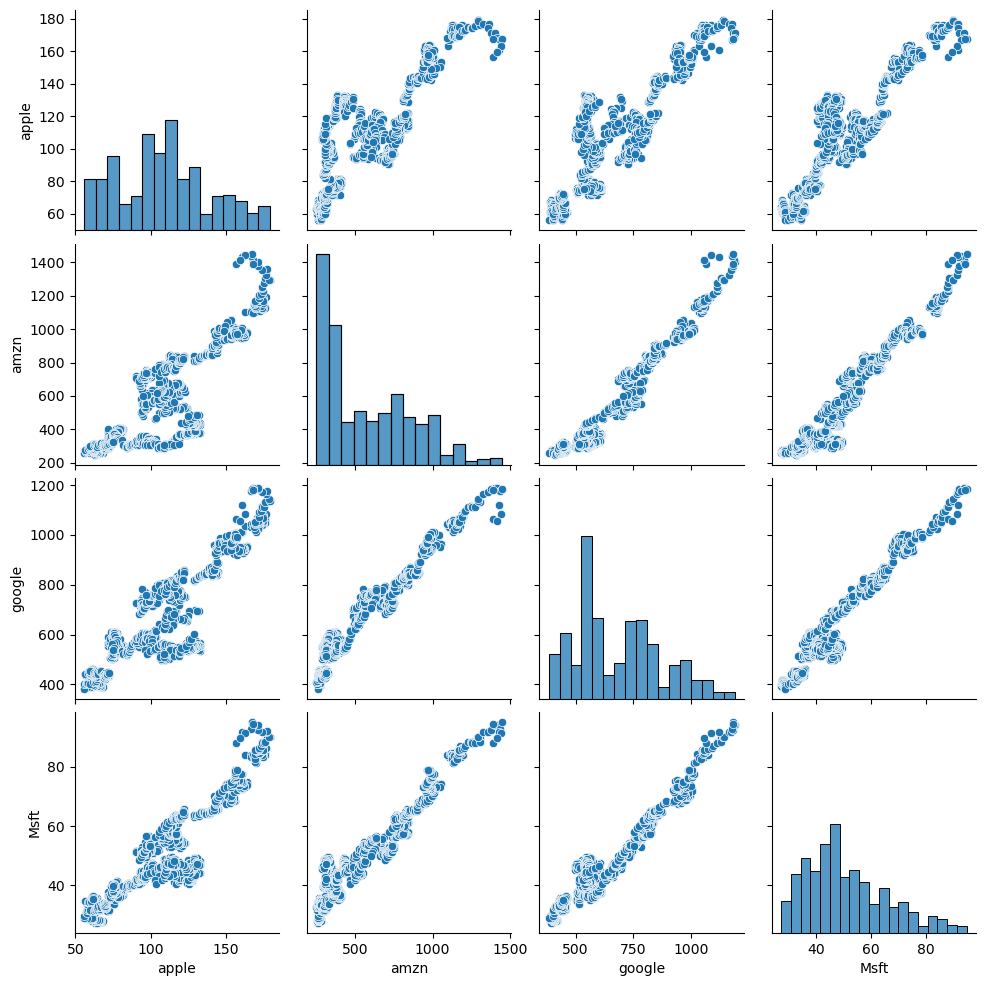

In [74]:
sns.pairplot(co__r)

In [75]:
co__r.corr()

apple      amzn    google      Msft
apple   1.000000  0.819078  0.843736  0.899689
amzn    0.819078  1.000000  0.973988  0.955977
google  0.843736  0.973988  1.000000  0.970779
Msft    0.899689  0.955977  0.970779  1.000000

<AxesSubplot:>

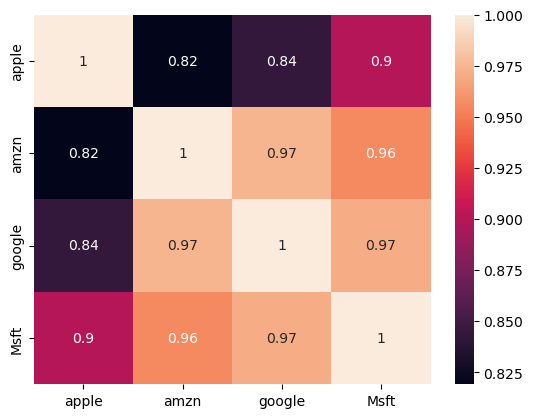

In [77]:
sns.heatmap(co__r.corr(), annot = True)